# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt , colors
%matplotlib inline

## Task 1

In [44]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [45]:
df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
71,6.1,2.8,4.0,1.3,versicolor
116,6.5,3.0,5.5,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa


In [46]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [49]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [50]:
df['petal_length'].max()

6.9

In [51]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


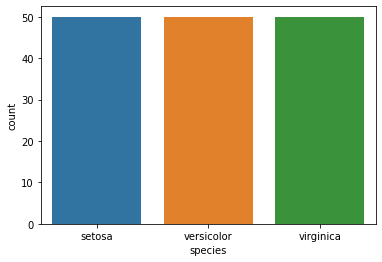

In [61]:
import seaborn as sns

sns.countplot(df['species']);

## Task 3

In [52]:
# use groupby to look for differences between the species

df.groupby(['species','sepal_length','petal_length','sepal_width','petal_width']).count()

Empty DataFrame
Columns: []
Index: [(setosa, 4.3, 1.1, 3.0, 0.1), (setosa, 4.4, 1.3, 3.0, 0.2), (setosa, 4.4, 1.3, 3.2, 0.2), (setosa, 4.4, 1.4, 2.9, 0.2), (setosa, 4.5, 1.3, 2.3, 0.3), (setosa, 4.6, 1.0, 3.6, 0.2), (setosa, 4.6, 1.4, 3.2, 0.2), (setosa, 4.6, 1.4, 3.4, 0.3), (setosa, 4.6, 1.5, 3.1, 0.2), (setosa, 4.7, 1.3, 3.2, 0.2), (setosa, 4.7, 1.6, 3.2, 0.2), (setosa, 4.8, 1.4, 3.0, 0.1), (setosa, 4.8, 1.4, 3.0, 0.3), (setosa, 4.8, 1.6, 3.1, 0.2), (setosa, 4.8, 1.6, 3.4, 0.2), (setosa, 4.8, 1.9, 3.4, 0.2), (setosa, 4.9, 1.4, 3.0, 0.2), (setosa, 4.9, 1.5, 3.1, 0.1), (setosa, 5.0, 1.2, 3.2, 0.2), (setosa, 5.0, 1.3, 3.5, 0.3), (setosa, 5.0, 1.4, 3.3, 0.2), (setosa, 5.0, 1.4, 3.6, 0.2), (setosa, 5.0, 1.5, 3.4, 0.2), (setosa, 5.0, 1.6, 3.0, 0.2), (setosa, 5.0, 1.6, 3.4, 0.4), (setosa, 5.0, 1.6, 3.5, 0.6), (setosa, 5.1, 1.4, 3.5, 0.2), (setosa, 5.1, 1.4, 3.5, 0.3), (setosa, 5.1, 1.5, 3.4, 0.2), (setosa, 5.1, 1.5, 3.7, 0.4), (setosa, 5.1, 1.5, 3.8, 0.3), (setosa, 5.1, 1.6, 3.8, 0.2), (setosa, 5.1, 1.7, 3.3, 0.5), (setosa, 5.1, 1.9, 3.8, 0.4), (setosa, 5.2, 1.4, 3.4, 0.2), (setosa, 5.2, 1.5, 3.5, 0.2), (setosa, 5.2, 1.5, 4.1, 0.1), (setosa, 5.3, 1.5, 3.7, 0.2), (setosa, 5.4, 1.3, 3.9, 0.4), (setosa, 5.4, 1.5, 3.4, 0.4), (setosa, 5.4, 1.5, 3.7, 0.2), (setosa, 5.4, 1.7, 3.4, 0.2), (setosa, 5.4, 1.7, 3.9, 0.4), (setosa, 5.5, 1.3, 3.5, 0.2), (setosa, 5.5, 1.4, 4.2, 0.2), (setosa, 5.7, 1.5, 4.4, 0.4), (setosa, 5.7, 1.7, 3.8, 0.3), (setosa, 5.8, 1.2, 4.0, 0.2), (versicolor, 4.9, 3.3, 2.4, 1.0), (versicolor, 5.0, 3.3, 2.3, 1.0), (versicolor, 5.0, 3.5, 2.0, 1.0), (versicolor, 5.1, 3.0, 2.5, 1.1), (versicolor, 5.2, 3.9, 2.7, 1.4), (versicolor, 5.4, 4.5, 3.0, 1.5), (versicolor, 5.5, 3.7, 2.4, 1.0), (versicolor, 5.5, 3.8, 2.4, 1.1), (versicolor, 5.5, 4.0, 2.3, 1.3), (versicolor, 5.5, 4.0, 2.5, 1.3), (versicolor, 5.5, 4.4, 2.6, 1.2), (versicolor, 5.6, 3.6, 2.9, 1.3), (versicolor, 5.6, 3.9, 2.5, 1.1), (versicolor, 5.6, 4.1, 3.0, 1.3), (versicolor, 5.6, 4.2, 2.7, 1.3), (versicolor, 5.6, 4.5, 3.0, 1.5), (versicolor, 5.7, 3.5, 2.6, 1.0), (versicolor, 5.7, 4.1, 2.8, 1.3), (versicolor, 5.7, 4.2, 2.9, 1.3), (versicolor, 5.7, 4.2, 3.0, 1.2), (versicolor, 5.7, 4.5, 2.8, 1.3), (versicolor, 5.8, 3.9, 2.7, 1.2), (versicolor, 5.8, 4.0, 2.6, 1.2), (versicolor, 5.8, 4.1, 2.7, 1.0), (versicolor, 5.9, 4.2, 3.0, 1.5), (versicolor, 5.9, 4.8, 3.2, 1.8), (versicolor, 6.0, 4.0, 2.2, 1.0), (versicolor, 6.0, 4.5, 2.9, 1.5), (versicolor, 6.0, 4.5, 3.4, 1.6), (versicolor, 6.0, 5.1, 2.7, 1.6), (versicolor, 6.1, 4.0, 2.8, 1.3), (versicolor, 6.1, 4.6, 3.0, 1.4), (versicolor, 6.1, 4.7, 2.8, 1.2), (versicolor, 6.1, 4.7, 2.9, 1.4), (versicolor, 6.2, 4.3, 2.9, 1.3), (versicolor, 6.2, 4.5, 2.2, 1.5), (versicolor, 6.3, 4.4, 2.3, 1.3), (versicolor, 6.3, 4.7, 3.3, 1.6), (versicolor, 6.3, 4.9, 2.5, 1.5), (versicolor, 6.4, 4.3, 2.9, 1.3), (versicolor, 6.4, 4.5, 3.2, 1.5), (versicolor, 6.5, 4.6, 2.8, 1.5), (versicolor, 6.6, 4.4, 3.0, 1.4), (versicolor, 6.6, 4.6, 2.9, 1.3), (versicolor, 6.7, 4.4, 3.1, 1.4), (versicolor, 6.7, 4.7, 3.1, 1.5), (versicolor, 6.7, 5.0, 3.0, 1.7), (versicolor, 6.8, 4.8, 2.8, 1.4), (versicolor, 6.9, 4.9, 3.1, 1.5), (versicolor, 7.0, 4.7, 3.2, 1.4), (virginica, 4.9, 4.5, 2.5, 1.7), (virginica, 5.6, 4.9, 2.8, 2.0), ...]

[147 rows x 0 columns]

In [53]:
# use sorting to look for differences between the species

df.sort_values(by='species',ascending=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,virginica
120,6.9,3.2,5.7,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica


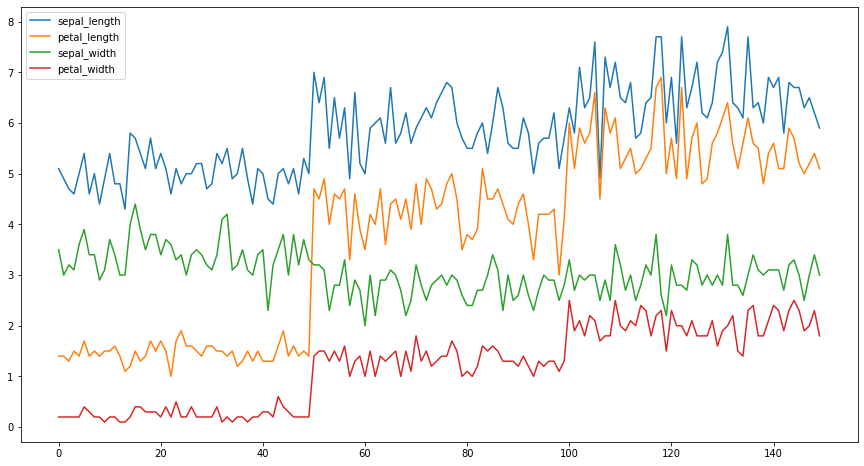

In [64]:
# use plotting to look for differences between the species

plt.figure(figsize=(15,8))
df.sepal_length.plot(),df.petal_length.plot(),df.sepal_width.plot(),df.petal_width.plot()
plt.legend();

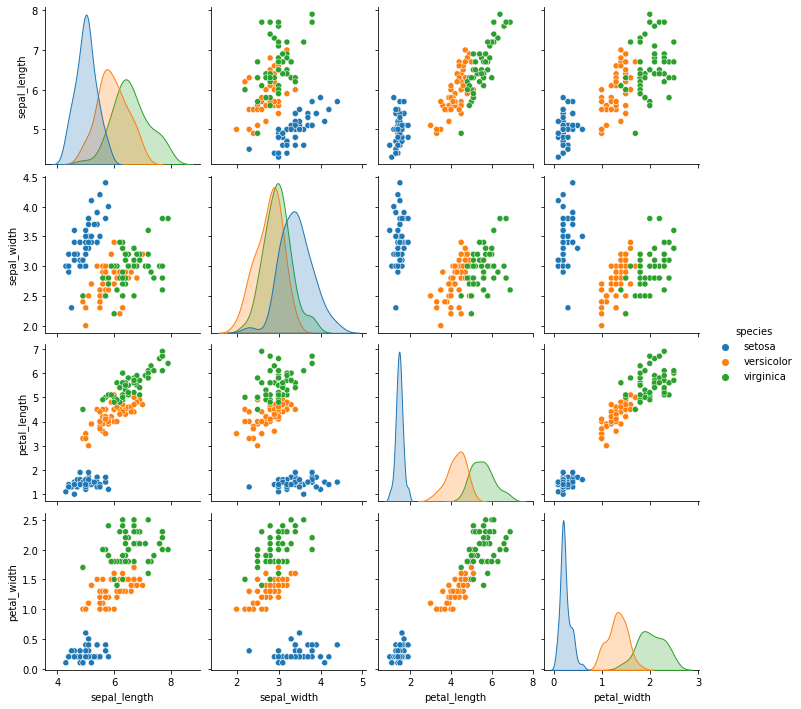

In [63]:
sns.pairplot(df,hue='species');

In [58]:
# map species to a numeric value so that plots can be colored by category


#YAPAMADIM!

## Task 4

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

s = SVC()

In [77]:
x = df.drop('species',axis=1)
y = df['species']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [79]:
pred = s.fit(x_train,y_train).predict(x_test)

In [80]:
confusion_matrix(y_test,pred)         #%100 doğru tahmin etti

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Bonus

In [81]:
df.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,virginica


In [82]:
# define function that accepts a row of data and returns a predicted species

s.predict([[6.1,3.0,4.9,1.8]])

array(['virginica'], dtype=object)